In [252]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os

In [253]:
S = 2000
N = 30
sd = 0.2

In [428]:

def s_prior(x, y):
    return 1 / S

def p_v_s1_s2(v, d1, d2):
    c = (v - (1 / (d1 + 0.1) + 1 / (d2 + 0.1)))
    s = sd * sd * 2
    return np.exp(-c * c / s) / (sd * np.sqrt(2 * np.pi))

def p_v_s1(v, d1):
    c = (v - (1 / (d1 + 0.1)))
    s = sd * sd * 2
    return np.exp(-c * c / s) / (sd * np.sqrt(2 * np.pi)) 

def prepare_data():
    station_readings = []
    station_loc = []
    loc = []
    with open("EarthquakeExerciseData.txt") as dat:
        obs = dat.readlines()
        for i, v in enumerate(obs):
            theta = 2 * math.pi * (i + 1) / N
            v = float(v.strip())
            station_readings.append(v)
            station_loc.append(np.array([math.cos(theta), math.sin(theta)]))
    for i in range(1, S + 1):
        theta = 25 * 2 * math.pi * i / S
        r = i / S
        pos = r * np.array([math.cos(theta), math.sin(theta)])
        loc.append(pos)

    return (np.array(station_readings), np.array(station_loc), np.array(loc))

def p_v_table(V, V_loc, S_loc):
    T = np.zeros(shape=(S, S))
    for i in range(S):
        for j in range(i, S):
            s = 0
            for k in range(N):
                d1 = V_loc[k] - S_loc[i]
                d2 = V_loc[k] - S_loc[j]
                s += (V[k] - (1 / (d1 @ d1.T + 0.1) + 1 / (d2 @ d2.T + 0.1))) ** 2
            T[i,j] = np.exp(-0.5 * s / (sd * sd)) / ((sd * np.sqrt(2 * np.pi)) ** N)

    return T

def p_v_table_h1(V, V_loc, S_loc):
    T = np.zeros(shape=(S,))
    for i in range(S):
        s = 1
        for k in range(N):
            d1 = V_loc[k] - S_loc[i]
            g = p_v_s1(V[k], d1 @ d1.T)
            s *= g
        T[i] = s

    return T

In [429]:
V, Vloc, Sloc = prepare_data()

In [439]:
if os.path.exists("Pv_table.npy"):
    T = np.load("Pv_table.npy")
else:
    T = p_v_table(V, Vloc, Sloc)

In [440]:
T.max()

5786.0004316028935

In [441]:
T.min()

0.0

In [442]:
Pv = np.sum(T) / (S * S)

In [443]:
P_s_v = (np.sum(T, axis=0) / (Pv * S * S))

In [444]:
np.save("Pv_table", T)

In [445]:
def plot_distr(posterior):
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(Sloc[:,0].ravel(), Sloc[:,1].ravel(), c=posterior, cmap='binary')
    plt.scatter(Vloc[:,0].ravel(), Vloc[:,1].ravel(), c=V, cmap="Reds")
    plt.colorbar()

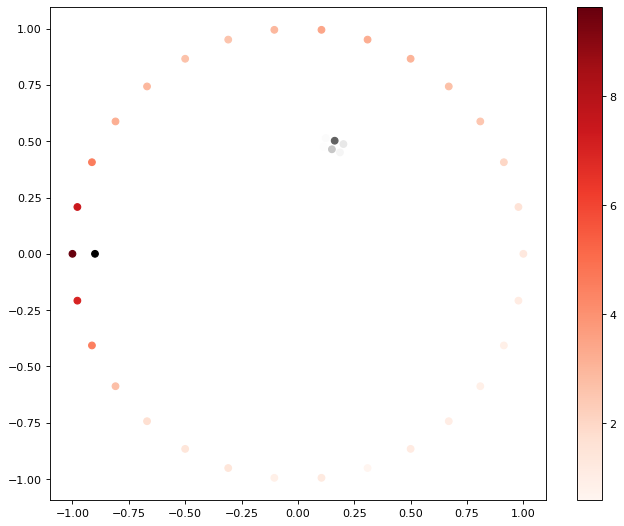

In [446]:
plot_distr(P_s_v)

In [447]:
P_s_v.sum()

1.0

In [418]:
T_h1 = p_v_table_h1(V, Vloc, Sloc)

In [419]:
Pv_h1 = np.sum(T_h1) / S

In [420]:
P_s_v_h1 = (T_h1 / T_h1.sum())

In [421]:
T_h1.sum()

5e-324

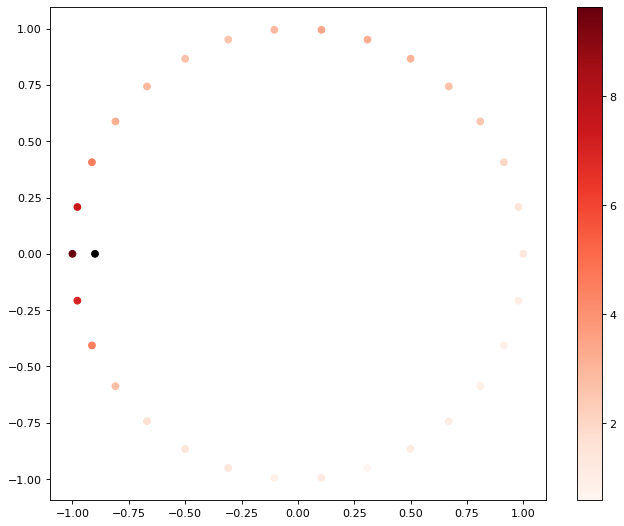

In [422]:
plot_distr(P_s_v_h1)

In [423]:
lgpvh1 = np.log(T_h1.sum()) - np.log(S)

In [424]:
lgpvh1

-752.0409743809233

In [425]:
lgpvh2 = np.log(Pv)

In [426]:
lgpvh2

-5.364707258798248

In [427]:
lgpvh2 - lgpvh1

746.6762671221251